# Tutorial 9a - Edmund Optics Catalogue

### August 2024

This tutorial shows how to retrieve optical components from the [Edmund Optics](https://www.edmundoptics.com/) lens catalogue. In particular, we cover:
- How to open Zemax files in Optiland
- How to retrieve and analyze an aspheric lens from the Edmund Optics catalogue

Optiland uses the "ZemaxFileReader" in the file_handler module to open Zemax (.zmx) files. We can pass either a file directly or a URL link to the file. If a URL is provided, Optiland downloads the file prior to extracting the lens data.

In [1]:
from optiland.file_handler import ZemaxFileReader
from optiland import analysis

### File retrieval

For this example, we will use a [15 mm Dia., 0.33 Numerical Aperture Uncoated, Aspheric Lens](https://www.edmundoptics.com/p/15mm-dia-033-numerical-aperture-uncoated-aspheric-lens/7881/). We pass the filename of the downloaded .zmx file to our ZemaxFileReader:

In [2]:
filename = "zmax_47728.zmx"  # downloaded from link above
reader = ZemaxFileReader(filename)

### Lens model generation

After retrieving the files, we can convert the Zemax model directly into an Optiland 'Optic' instance and draw the lens.

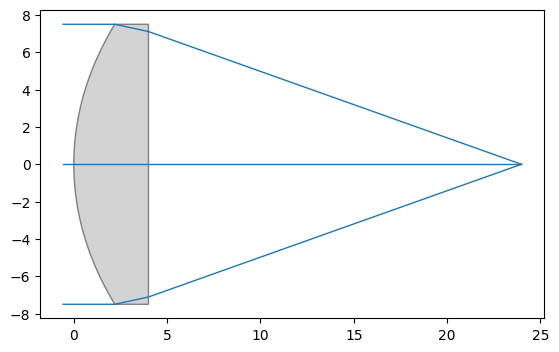

In [3]:
lens = reader.generate_lens()

lens.draw()

We also print an overview of the lens data. This currently excludes the aspheric coefficients.

In [4]:
lens.info()

+----+--------------+----------+-------------+------------+----------+-----------------+
|    | Type         |   Radius |   Thickness | Material   |    Conic |   Semi-aperture |
|----+--------------+----------+-------------+------------+----------+-----------------|
|  0 | Planar       |  inf     |    inf      | Air        |  0       |     7.5         |
|  1 | Even Asphere |   13.255 |      4      | L-BAL35    | -2.36414 |     7.5         |
|  2 | Planar       |  inf     |     19.9823 | Air        |  0       |     6.66094     |
|  3 | Planar       |  inf     |    nan      | Air        |  0       |     2.66454e-15 |
+----+--------------+----------+-------------+------------+----------+-----------------+


### Lens Analysis

To assess performance, we generate a spot diagram and the ray aberration fans::

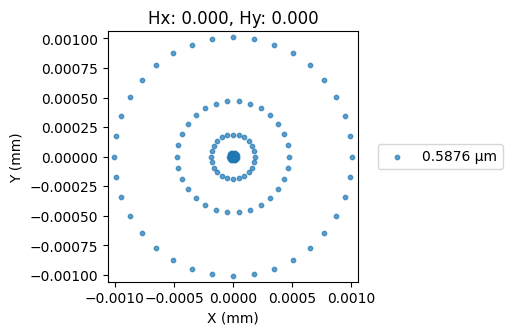

In [5]:
spot = analysis.SpotDiagram(lens)
spot.view()

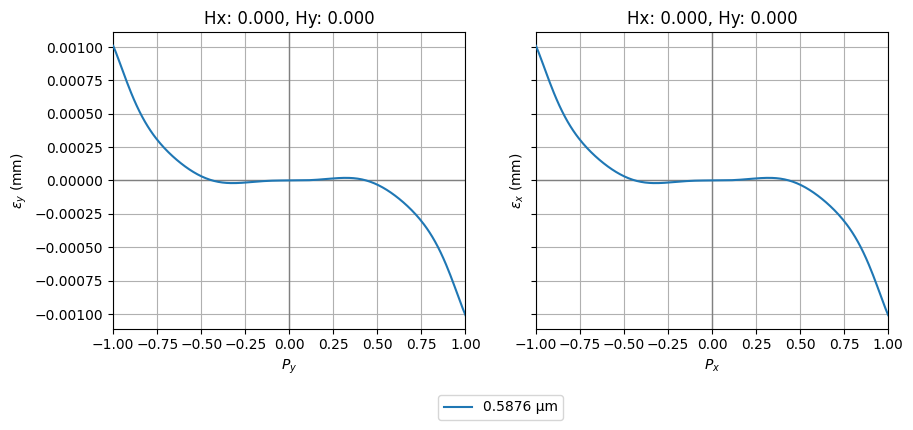

In [6]:
fan = analysis.RayFan(lens)
fan.view()

### Conclusions
- This tutorial showed how to retrieve and analyze an Edmund Optics catalogue lens.
- The ZemaxFileReader does not currently support all Zemax surface types and may fail to convert a lens into an Optiland Optic instance in some cases. Users are encouraged to create an issue on the GitHub page if an error occurs.